In [435]:
# "C:\Users\welcome\Desktop\python\titanic.csv"

In [436]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [437]:
%matplotlib inline

In [438]:
data_frame= pd.read_csv("https://raw.githubusercontent.com/howtocode-com-bd/ml.howtocode.com.bd/master/datasets/pima%20diabetes%20data/pima-data-orig.csv")

In [439]:
data_frame.shape

(768, 9)

In [440]:
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [441]:
data_frame.tail()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [442]:
data_frame.isnull()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [443]:
data_frame.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [444]:
data_frame.isnull().values.any()

False

In [445]:
# Here size means plot-size
def corr_heatmap(data_frame, size=11):
  # Getting correlation using Pandas
  correlation = data_frame.corr()

  # Dividing the plot into subplots for increasing size of plots
  fig, heatmap = plt.subplots(figsize=(size, size))

  # Plotting the correlation heatmap
  heatmap.matshow(correlation)

  # Adding xticks and yticks
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)

  # Displaying the graph
  plt.show()
   

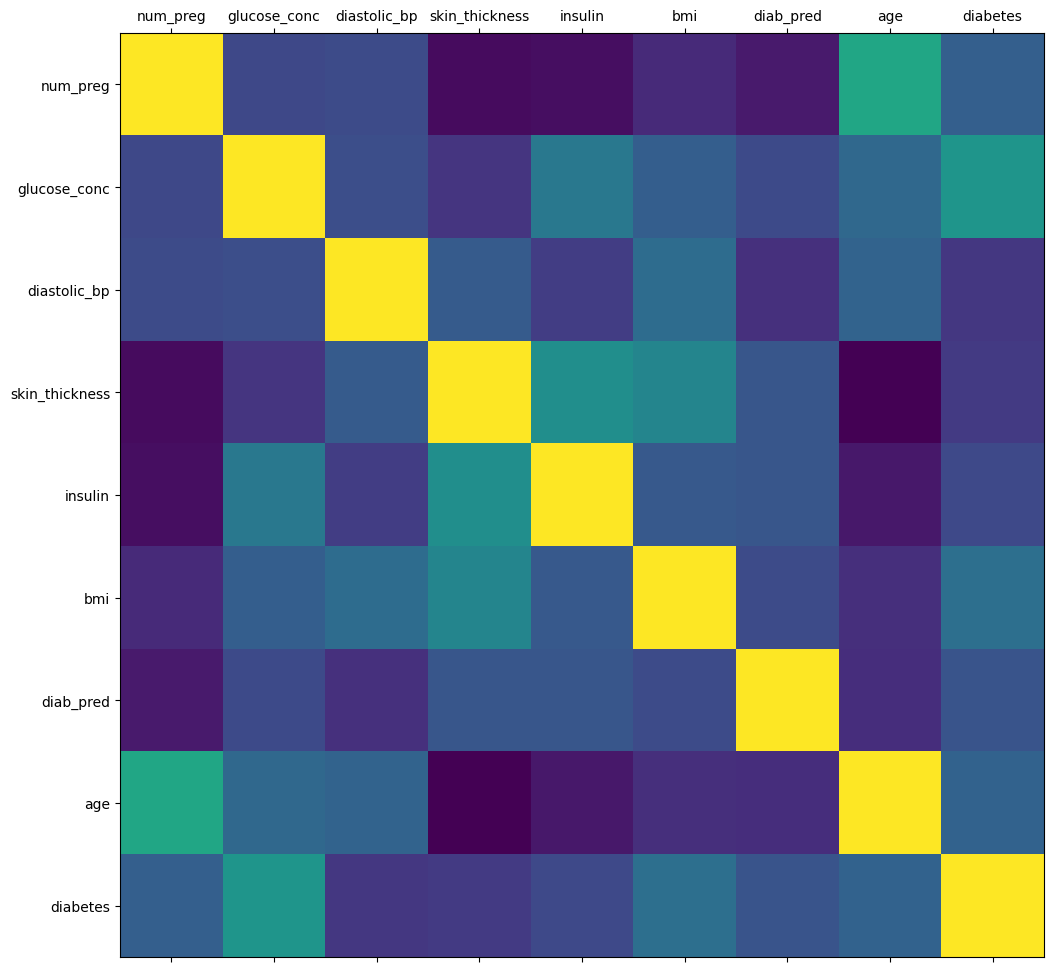

In [446]:
corr_heatmap(data_frame, 12)

In [447]:
# Deleting 'skin' column completely
#del data_frame['skin']
# Checking if the action was successful or not
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [448]:
# Data type changing

# Mapping the values
#map_diabetes = {True : 1, False : 0}

# Setting the map to the data_frame
#data_frame['diabetes'] = data_frame['diabetes'].map(map_diabetes)

# Let's see what we have done
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [449]:
# Pythonic Way (True / False Ratio চেক করা)
num_true = len(data_frame.loc[data_frame['diabetes'] == True])
num_false = len(data_frame.loc[data_frame['diabetes'] == False])
print ("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print ("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, (num_true / (num_true + num_false)) * 100))

Number of True Cases: 268 (34.90%)
Number of False Cases: 500 (34.90%)


In [450]:
from sklearn.model_selection import train_test_split
feature_column_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_name = ['diabetes']
# Getting feature variable values

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [451]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

69.92% in training set
30.08% in test set


In [452]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['skin_thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [453]:

from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())




GaussianNB()

In [454]:
prediction_from_trained_data = nb_model.predict(X_train)

In [455]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7672


In [456]:
prediction_from_trained_data = nb_model.predict(X_test)

# performance metrics library
from sklearn import metrics

# get current accuracy of the model

accuracy = metrics.accuracy_score(y_test, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7446
